In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

In [2]:
def get_coordinates_through_sql(database, query):
    conn = sqlite3.connect(database)
    c = conn.cursor()

    c.execute(query)
    coordinates = c.fetchall()
    
    return coordinates

In [43]:
def generate_compass(points, title):
    # Create figure and axis
    fig, ax = plt.subplots()

    # Define the boundaries of the compass
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

    # Plot the axes
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    # Plot the points
    for point in points:
        x, y = point
        if x > 0 and y > 0:
            ax.scatter(x, y, color='blue')  # Right-wing authoritarian
        elif x < 0 and y > 0:
            ax.scatter(x, y, color='red')   # Left-wing authoritarian
        elif x < 0 and y < 0:
            ax.scatter(x, y, color='green') # Left-wing libertarian
        elif x > 0 and y < 0:
            ax.scatter(x, y, color='yellow')# Right-wing libertarian

    # Set labels and title
    ax.set_xlabel('Economic Left <---> Economic Right')
    ax.set_ylabel('Social Libertarian <---> Social Authoritarian')
    ax.set_title(title)

    # Show the plot
    plt.grid(True)
    plt.show()

In [50]:
def generate_compass(points, title):
    
    fig, ax = plt.subplots(layout='constrained')
    
    ax.set_axisbelow(True)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.grid(visible=True, linewidth=3, color='#a1a1a1')
    ax.set(xlim=(-10,10), xticks=np.arange(-10,11),
        ylim=(-10,10), yticks=np.arange(-10,11))
    ax.fill_between([-10,0],-10,0,alpha=0.7, color='#98ed96') #GREEN
    ax.fill_between([0,10],-10,0,alpha=0.7, color='#bf9aed') #PURPLE
    ax.fill_between([-10,0],0,10,alpha=0.7, color='#fe7475') #RED
    ax.fill_between([0,10],0,10,alpha=0.7, color='#42aaff') #BLUE
    ax.set_title(title)

    for point in points:
        x, y = point
        ax.scatter(x, y, s=100, color='#e3c51e',marker='*', linewidths=.5, edgecolors= '#000000')
        ax.annotate(('  '+str((x,y))), (x,y))
        ax.set_aspect('equal')
    plt.xticks(visible=False)
    plt.yticks(visible=False)
    plt.show()

In [69]:
query = ''' SELECT x_coordinate, y_coordinate
            FROM coordinates
            WHERE country = 'NZ'
'''

points = get_coordinates_through_sql('tweets.db',query)

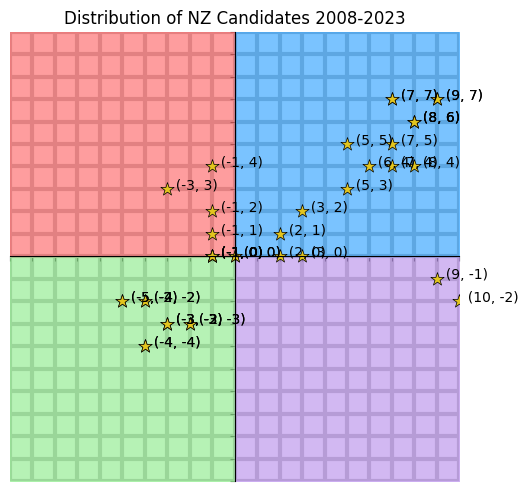

In [70]:
generate_compass(points, 'Distribution of NZ Candidates 2008-2023')